In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
train_images.shape

(60000, 28, 28)

In [12]:
len(train_labels)

60000

In [14]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
test_images.shape

(10000, 28, 28)

In [18]:
len(test_labels)

10000

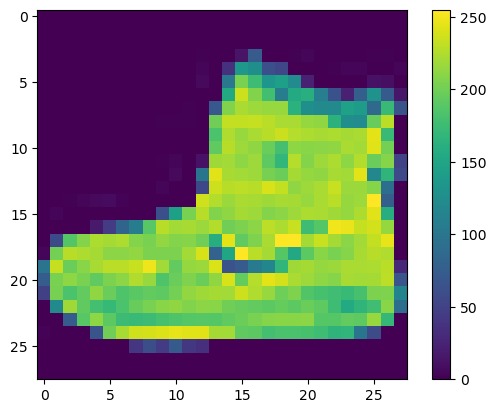

In [20]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [22]:
train_images = train_images / 255.0

test_images = test_images / 255.0

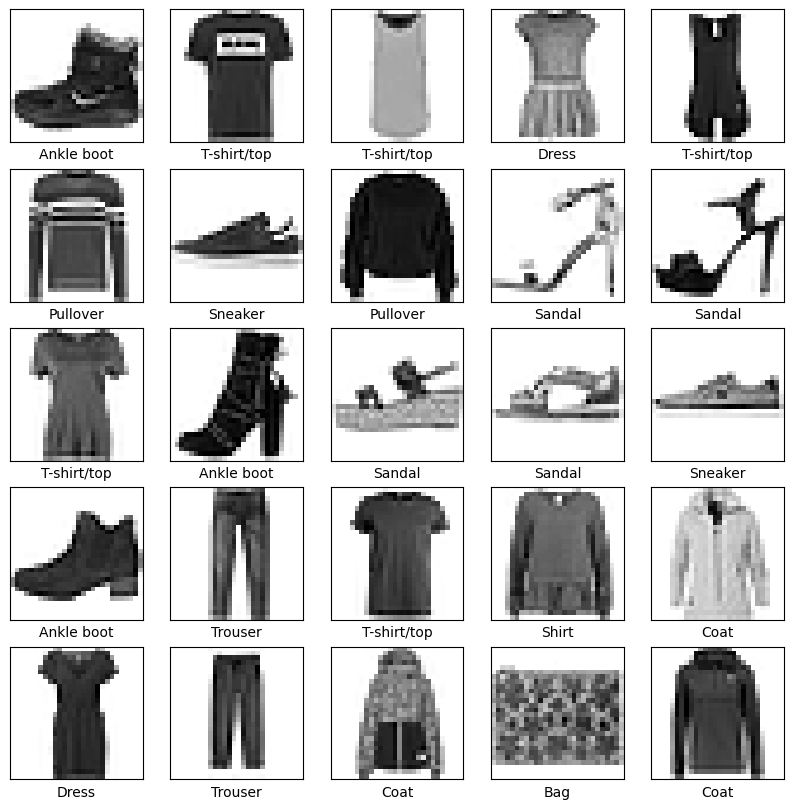

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense

model = Sequential([
    Input(shape=(28, 28)),         # <-- Add Input layer separately
    Flatten(),
    Dense(128, activation='relu'),
])


In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5957 - loss: 2.0067
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6879 - loss: 1.5105
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6954 - loss: 1.4501
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7027 - loss: 1.4379
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7040 - loss: 1.4104
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7103 - loss: 1.3930
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7057 - loss: 1.4062
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7136 - loss: 1.3757
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7096 - loss: 1.3831
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7108 - loss: 1.3710
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7135 - loss: 1.3665
Epoch 12/30
1875/1875 ━━━━━━━━

In [34]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.6931 - loss: 1.4140

Test accuracy: 0.6930999755859375


In [38]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [40]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [42]:
predictions[0]

array([4.3617582e-04, 4.3617582e-04, 5.6380196e-04, 4.3617582e-04,
       4.3617582e-04, 8.6728282e-02, 1.2308415e-03, 4.3617582e-04,
       2.9202455e-03, 8.5490716e-01, 4.3617582e-04, 4.3617582e-04,
       4.3617582e-04, 4.3617582e-04, 4.3617582e-04, 4.3617582e-04,
       4.3617582e-04, 4.3617582e-04, 4.3617582e-04, 4.3617582e-04,
       4.3617582e-04, 4.3617582e-04, 4.3617582e-04, 4.3617582e-04,
       4.3617582e-04, 4.3617582e-04, 4.3617582e-04, 4.3617582e-04,
       4.3617582e-04, 4.3617582e-04, 4.3617582e-04, 4.3617582e-04,
       4.3617582e-04, 4.3617582e-04, 4.3617582e-04, 4.3617582e-04,
       4.3617582e-04, 4.3617582e-04, 4.3617582e-04, 4.3617582e-04,
       4.3617582e-04, 4.3617582e-04, 4.3617582e-04, 4.3617582e-04,
       4.3617582e-04, 4.3617582e-04, 4.3617582e-04, 4.3617582e-04,
       4.3617582e-04, 4.3617582e-04, 4.3617582e-04, 4.3617582e-04,
       4.3617582e-04, 4.3617582e-04, 4.3617582e-04, 4.3617582e-04,
       4.3617582e-04, 4.3617582e-04, 4.3617582e-04, 4.3617582e

In [44]:
np.argmax(predictions[0])

9

In [46]:
test_labels[0]

9

Epoch 1/10


C:\Users\ishab\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7804 - loss: 0.6369
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8618 - loss: 0.3848
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8768 - loss: 0.3370
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8839 - loss: 0.3178
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8892 - loss: 0.2993
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8930 - loss: 0.2848
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8984 - loss: 0.2709
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9049 - loss: 0.2562
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9085 - loss: 0.2450
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9085 - loss: 0.2423
313/313 - 0s - 1ms/step - accuracy: 0.8733 - loss: 0.3660

Test accuracy: 0.8733000159263611
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 937us

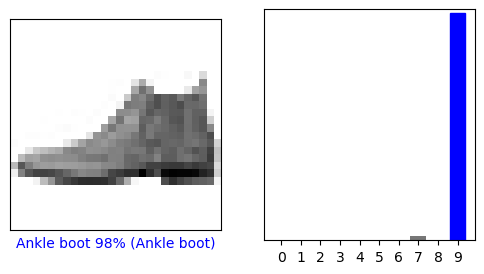

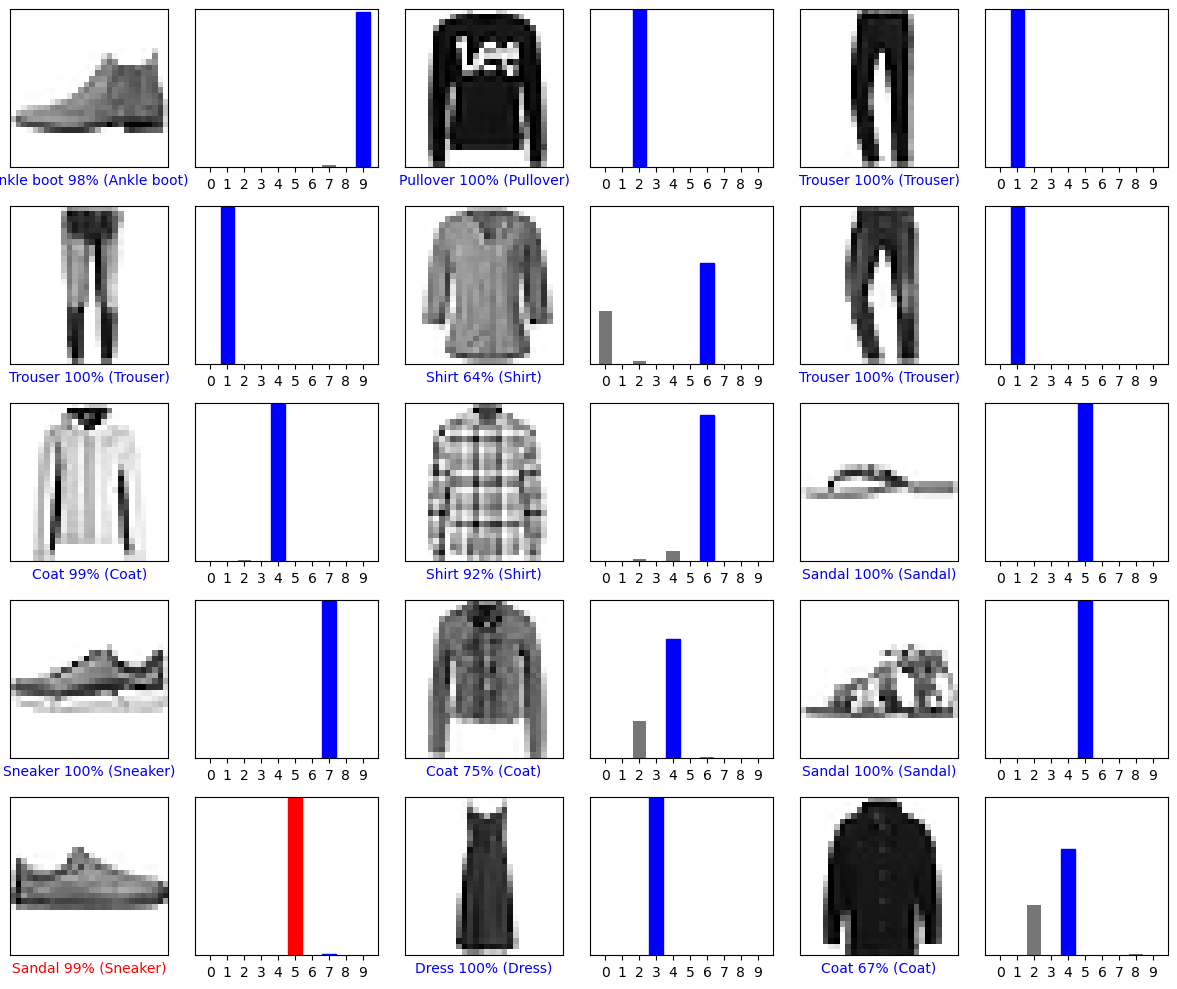

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Load dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Normalize
train_images = train_images / 255.0
test_images = test_images / 255.0

# Build model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train model
model.fit(train_images, train_labels, epochs=10)

# Evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Make predictions
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

# Functions to plot
def plot_image(i, predictions_array, true_label, img):
    img = img[i]
    true_label = true_label[i]
    predictions_array = predictions_array[i]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array = predictions_array[i]

    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Plot single prediction
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels[i])
plt.show()

# Plot multiple predictions (example: first 15)
num_rows = 5
num_cols = 3
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(15):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels[i])
plt.tight_layout()
plt.show()


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7786 - loss: 0.6291
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8614 - loss: 0.3840
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8776 - loss: 0.3355
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8863 - loss: 0.3095
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.8930 - loss: 0.2921
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8992 - loss: 0.2769
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8998 - loss: 0.2697
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9046 - loss: 0.2576
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9084 - loss: 0.2439
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9140 - loss: 0.2335
313/313 - 3s - 9ms/step - accuracy: 0.8812 - loss: 0.3419

Test accuracy: 0.8812000155448914
313/313 ━━━━━

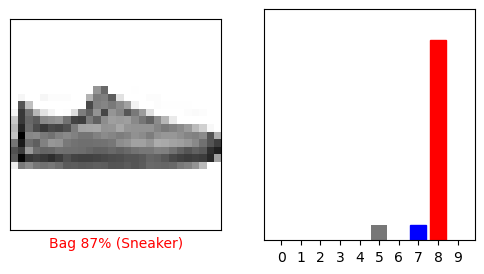

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Load dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Normalize
train_images = train_images / 255.0
test_images = test_images / 255.0

# Build model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train model
model.fit(train_images, train_labels, epochs=10)

# Evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Make predictions
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

# Functions to plot
def plot_image(i, predictions_array, true_label, img):
    img = img[i]
    true_label = true_label[i]
    predictions_array = predictions_array[i]  # This line can be removed

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array = predictions_array  # This line can be removed

    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Plot single prediction
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels[i])  # Pass predictions[i] directly
plt.show()


In [55]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array = predictions_array  # This line can be removed

    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    
    # Convert true_label to an integer for proper indexing
    true_label = int(true_label)  # Ensure true_label is an integer scalar
    thisplot[true_label].set_color('blue')


In [57]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [59]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [61]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[1.0068302e-04 1.0355840e-11 9.9905998e-01 6.2228835e-08 2.6231757e-04
  4.6693659e-11 5.7695422e-04 5.3777647e-13 4.4447139e-09 4.7973360e-13]]


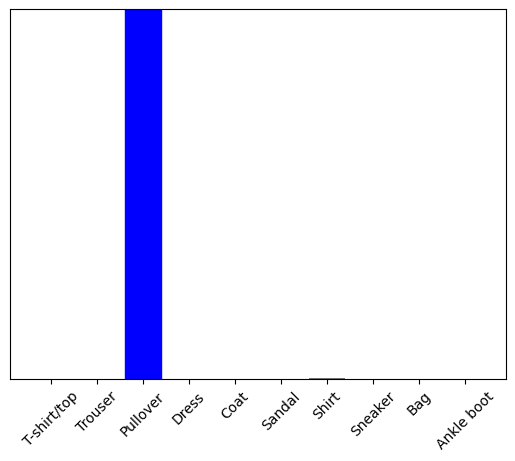

In [63]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array = predictions_array  # This line can be removed

    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    # true_label[i] should be used here
    true_label = true_label[i]  # Extract the true label for the image

    # Set the color for the predicted label and true label
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Example call
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()


In [65]:
np.argmax(predictions_single[0])

2